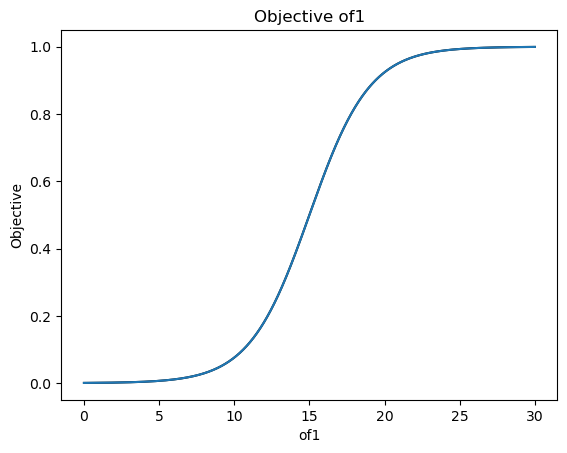

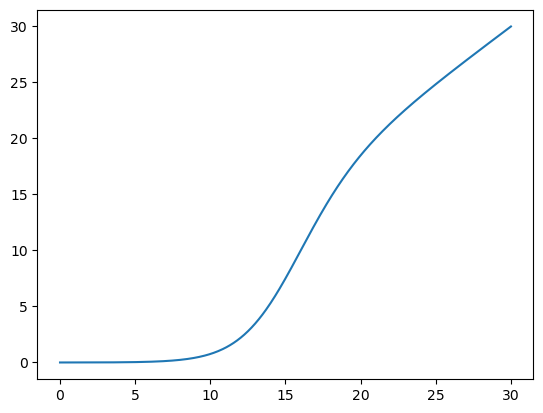

In [3]:
from bofire.domain.features import OutputFeatures, ContinuousOutput
from bofire.domain.objectives import MaximizeSigmoidObjective, MinimizeSigmoidObjective, TargetObjective
from botorch.utils.objective import soft_eval_constraint, apply_constraints
import matplotlib.pyplot as plt

import numpy as np
import torch

of1 = ContinuousOutput(key="of1", objective=MaximizeSigmoidObjective(w=1, tp=15, steepness=0.5))

c = of1.objective.get_callables(idx=0)


_, ax = of1.plot(0,30)#, line_options={"color":deep_purple})

#x = (np.linspace(0,30,500)-15)*-1
x = np.linspace(0,30,500)
xt = torch.from_numpy(x).unsqueeze(-1)
xtt = c[0](xt)

yt = soft_eval_constraint(xtt, 1./of1.objective.steepness)

y = yt.numpy()

ax.plot(np.linspace(0,30,500), y, label="botorch")

plt.show()

y_final = apply_constraints(obj=xt, samples=xt, eta = 1./of1.objective.steepness, constraints=c, infeasible_cost=0)

fig, ax = plt.subplots()
ax.plot(np.linspace(0,30,500), y_final, label="botorch")




In [4]:
yt.shape

torch.Size([500])

In [18]:
np.allclose(of1.objective.__call__(x),y.ravel())

True

In [16]:
y_final.ravel().shape

torch.Size([500])

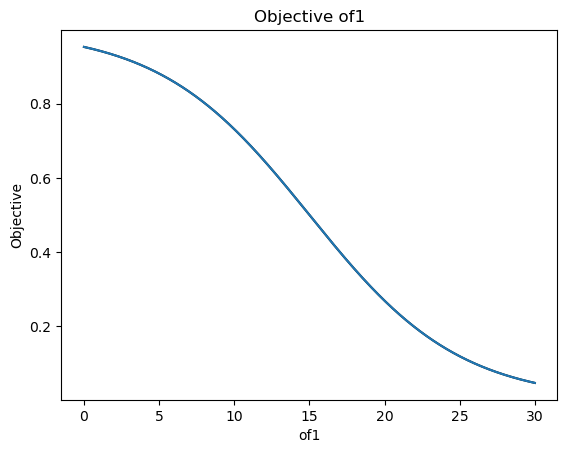

In [12]:
of1 = ContinuousOutput(key="of1", objective=MinimizeSigmoidObjective(w=1, tp=15, steepness=0.2))

c = of1.objective.get_callables(idx=0)


_, ax = of1.plot(0,30)#, line_options={"color":deep_purple})

#x = (np.linspace(0,30,500)-15)*-1
x = np.linspace(0,30,500)
xt = torch.from_numpy(x).unsqueeze(-1)
xtt = c[0](xt)

yt = soft_eval_constraint(xtt, 1./of1.objective.steepness)

y = yt.numpy()

ax.plot(np.linspace(0,30,500), y, label="botorch")


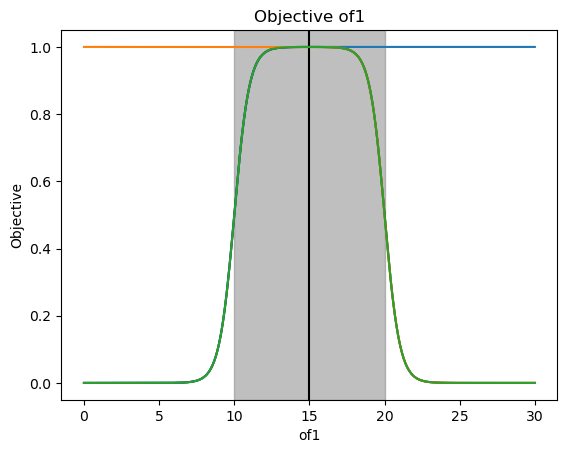

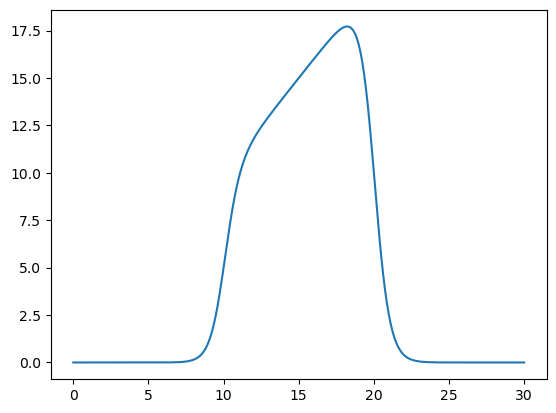

In [8]:
of1 = ContinuousOutput(key="of1", objective=TargetObjective(w=1, target_value=15, steepness=2, tolerance=5))

c = of1.objective.get_callables(idx=0)


_, ax = of1.plot(0,30)#, line_options={"color":deep_purple})

x = np.linspace(0,30,500)
xt = torch.from_numpy(x).unsqueeze(-1)
xtt1 = c[0](xt)
xtt2 = c[1](xt)

yt1 = soft_eval_constraint(xtt1, 1./of1.objective.steepness).numpy()
yt2 = soft_eval_constraint(xtt2, 1./of1.objective.steepness).numpy()

#y = yt.numpy()

ax.plot(np.linspace(0,30,500), yt1, label="botorch")
ax.plot(np.linspace(0,30,500), yt2, label="botorch")
ax.plot(np.linspace(0,30,500), yt2*yt1, label="botorch")

plt.show()

y_final = apply_constraints(obj=xt, samples=xt, eta = 1./of1.objective.steepness, constraints=c, infeasible_cost=0)

fig, ax = plt.subplots()
ax.plot(np.linspace(0,30,500), y_final, label="botorch")


In [ ]:
from bofire.domain.features import OutputFeatures, ContinuousOutput
from bofire.domain.objectives import MaximizeSigmoidObjective, MinimizeSigmoidObjective
import numpy as np
import torch

of1 = ContinuousOutput(key="of1", objective=MaximizeSigmoidObjective(w=1, tp=15, steepness=0.2))

c = of1.objective.get_callables(idx=0)


_, ax = of1.plot(0,30)#, line_options={"color":deep_purple})

x = (np.linspace(0,30,500)-15)*-1

xt = torch.from_numpy(x)

yt = torch.sigmoid(-xt/5)

y = yt.numpy()

ax.plot(np.linspace(0,30,500), y, label="botorch")

In [28]:
ax

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Objective of1'}, xlabel='of1', ylabel='Objective'>)

In [23]:
import numpy as np

x = (np.linspace(0,30,500)-15)*-1

xt = torch.from_numpy(x)

yt = torch.sigmoid(-xt/5)

y = yt.numpy()

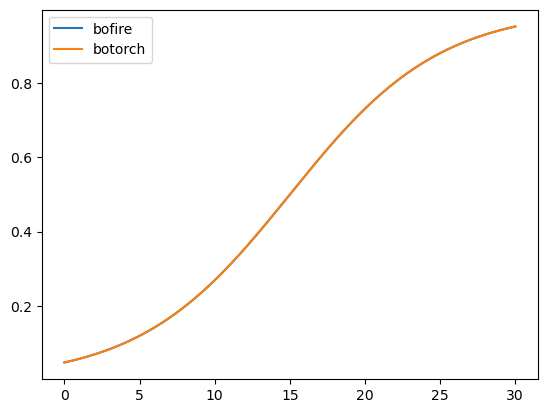

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(np.linspace(0,30,500), of1.objective(np.linspace(0,30,500)), label="bofire")
ax.plot(np.linspace(0,30,500), y, label="botorch")

ax.legend()